In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import classification_report, precision_recall_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import torch 
import os
import torch

import warnings
warnings.filterwarnings("ignore")

In [2]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print(device)

cuda


In [3]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/VAE-CTGAN/dataset/train_category.csv"
data = pd.read_csv(data_path, low_memory=False)

##load test data
test_data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/VAE-CTGAN/dataset/test_category.csv"
test_data = pd.read_csv(test_data_path)

In [8]:
print(f"The number of columns of Train : {len(data.columns)}\n")
for col in data.columns:
    print(f"{col} feature :\n {data[col].unique()}\n")

The number of columns of Train : 21

last_fico_range_high feature :
 [744. 739. 614. 604. 654. 804. 824. 659. 559. 724. 769. 589. 499. 694.
 584. 719. 689. 669. 779. 684. 674. 749. 649. 664. 734. 639. 634. 594.
 619. 544. 699. 679. 759. 729. 784. 709. 549. 629. 704. 564. 579. 529.
 569. 714. 754. 599. 764. 539. 574. 534. 519. 524. 644. 814. 609. 794.
 789. 829. 774. 799. 514. 819. 834. 509. 624. 839. 554. 809. 504. 844.
 850.   0.]

annual_inc feature :
 [50000.  60000.  75000.  ... 31235.  75388.  13235.5]

dti feature :
 [  4.66  16.14  24.67 ...  97.94  56.6  131.58]

mo_sin_old_rev_tl_op feature :
 [126.         151.         292.         206.         424.
 114.         308.         131.         275.         315.
 150.         365.         105.         333.         161.
 157.          95.         321.          81.         135.
 130.         117.         102.         223.         503.
 178.          56.         103.         199.         137.
 123.         138.          29.         18

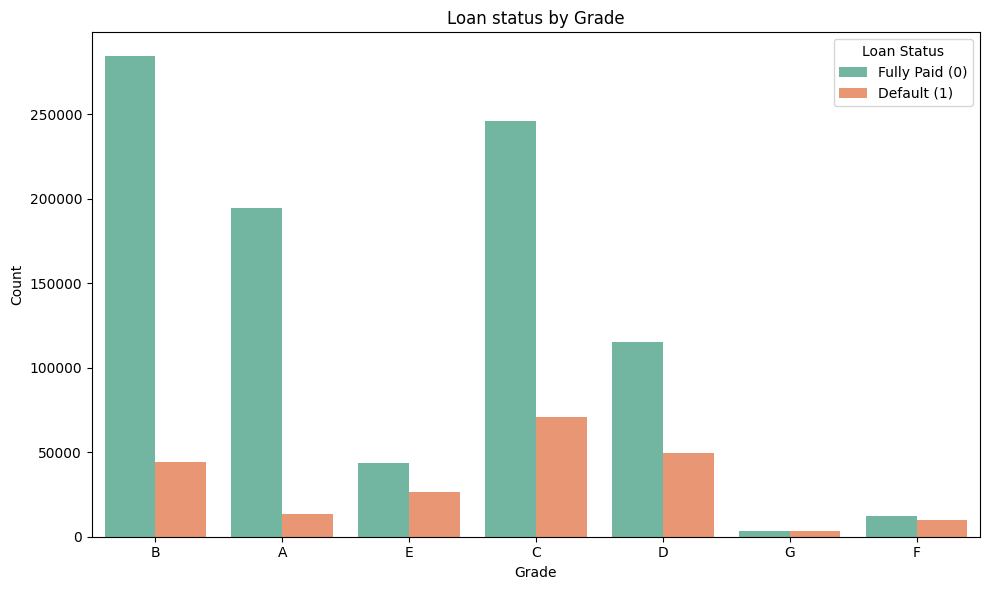

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x='grade', hue='loan_status', palette='Set2')
plt.title("Loan status by Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title='Loan Status', labels=['Fully Paid (0)', 'Default (1)'])
plt.tight_layout()
plt.show()


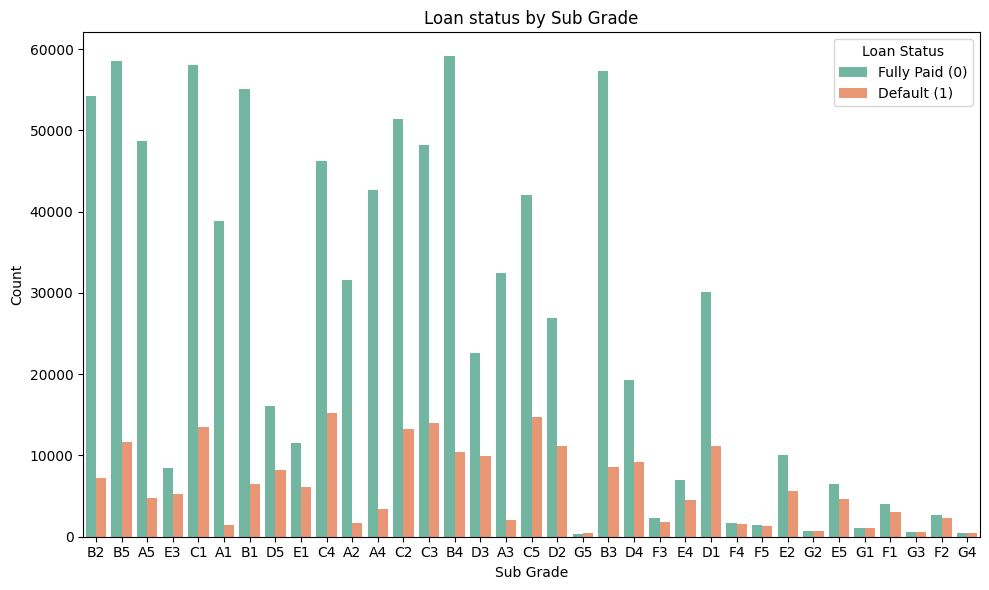

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x='sub_grade', hue='loan_status', palette='Set2')
plt.title("Loan status by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Count")
plt.legend(title='Loan Status', labels=['Fully Paid (0)', 'Default (1)'])
plt.tight_layout()
#plt.savefig('loan_status_by_subgrade.png')
plt.show()